In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib

In [4]:
datadir = 'C:/Users/khana/Documents/Masters/Semester 2/Earth and System Modelling/PLASIM/PLASIM Data/'
p100 = xr.open_dataset(datadir + 'p100_monthly.nc')
m100 = xr.open_dataset(datadir + 'm100_monthly.nc')
p500 = xr.open_dataset(datadir + 'p500_monthly.nc')
preind_atm = xr.open_dataset(datadir + 'preind_atm_monthly.nc')
preind_ocean = xr.open_dataset(datadir + 'preind_ocean_monthly.nc')

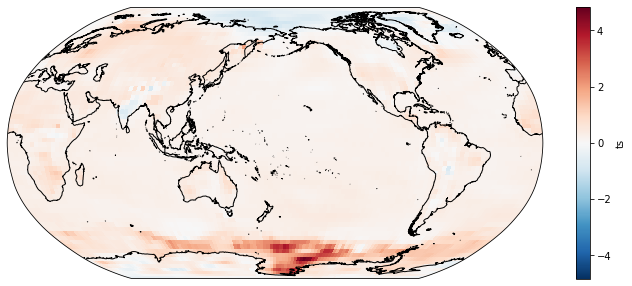

In [5]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))

ax.coastlines(resolution='50m')
ax.add_feature(cfeature.LAND)
(p100.ts.mean('time')-preind_atm.ts.mean('time')).plot(ax=ax, transform=ccrs.PlateCarree());

In [2]:
def temp_wrt_preind(C_new,time,q1,q2,d1,d2):
    """
    C_new = pulse carbon concentration i.e. p100 = 385 or p500 = 785 or m100 = 185
    time = length of time simulation will run for (monthly data available for 30 yrs)
    q1, q2 = radiative forcing constants (default = 0.33 K/m^2, 0.41 K/m^2)
    d1, d2 = some kind of time in years (default = 239 yrs, 4.1 yrs)
    
    """
    
    dx = np.zeros(shape=(time, time))
    R = np.zeros(shape=(time, time))
    temp = []
    
    F = 3.74/np.log(2) * np.log(C_new/285)
    
    for i in range(time):
        for j in range(time):
            if i >= j:
                dx[i][j] = i - j
                R[i][j] = q1*np.exp(-dx[i][j]/d1) + q2*np.exp(-dx[i][j]/d2)
                
        temp.append(np.sum(R[i]*F))
    
    return temp

In [18]:
t = np.arange(0,360,1)

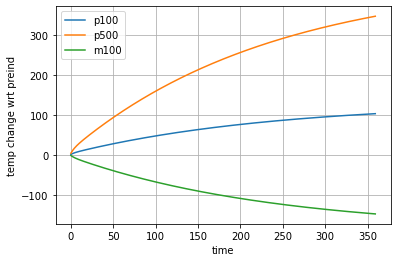

In [19]:
plt.plot(t, temp_wrt_preind(385,360,0.33,0.41,239,4.1), label = 'p100')
plt.plot(t, temp_wrt_preind(785,360,0.33,0.41,239,4.1), label = 'p500')
plt.plot(t, temp_wrt_preind(185,360,0.33,0.41,239,4.1), label = 'm100')
plt.xlabel('time')
plt.ylabel('temp change wrt preind')

plt.legend()
plt.grid()
plt.show()